In [89]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import newton
import scipy.integrate as it
import matplotlib.animation as animation

In [103]:
# mc2 = 511e3
# hbarc = 1240/2/np.pi
# c = 2.998e9

mc2 = 1
hbar = 1
c = 1

nx = 100
total_time = 50
nt = total_time*5
L = 1
V_type = 0

In [104]:
def V_rounded(x, L):
    V0 = 10
    a = L/3
    # v = V0 * (1 - (1/(x**6 + a**6)) - (1/((3*a-x)**6 + a**6)))
    v = V0 * (1 - (1/(x**6 + a**6)))
    if v > 1e3:
        print(x, v)
    return v if x >= 0 else np.inf

In [105]:
def V(x, L, V_type):
    if V_type == 0:
        return 0 if 0 <= x <= L else np.inf
    elif V_type == 1:
        return V_rounded(x, L)

In [125]:
def PDE(psi, t, x, V_type=0):
    dpsidt = np.zeros(2*nx)
    potential = [V(x[i], L, V_type) for i in range(nx)]
    for i in range(1, nx-1):
        d2psidx2_R = (psi[i+1] - 2*psi[i] + psi[i-1])/(2*(x[i+1] - x[i-1]))
        d2psidx2_I = (psi[nx+i+1] - 2*psi[nx+i] + psi[nx+i-1])/(2*(x[i+1] - x[i-1]))
        dpsidt[i] = (hbar/(2*mc2))*(d2psidx2_I) + potential[i]*psi[i]
        dpsidt[nx+i] = -(hbar/(2*mc2))*(d2psidx2_R) + potential[i]*psi[nx+i]
        
        if dpsidt[i] > 1e3:
            print(i, t, dpsidt[i], psi[i])
    return dpsidt

In [120]:
x = np.linspace(0, L, nx)
t = np.linspace(0, total_time, nt)

In [81]:
# Infinite square well
psi0_r = (1/np.sqrt(2))*(np.sqrt(2/L)*np.sin(np.pi*x/L) + np.sqrt(2/L)*np.sin(2*np.pi*x/L))
psi0 = np.concatenate((psi0_r, np.zeros(nx)))

In [64]:
# Expanding square well
L=3
x = np.linspace(0, L, nx)

psi0_r = np.sqrt(2/L)*np.sin(3*np.pi*x/L) * np.where(x < L/3, 1, 0)
psi0 = np.concatenate((psi0_r, np.zeros(nx)))

In [121]:
# Rounded square well
L=3
V_type = 1

x = np.linspace(0, L, nx)

psi0_r = np.sqrt(2/L)*np.sin(3*np.pi*x/L) * np.where(x < L/3, 1, 0)
psi0 = np.concatenate((psi0_r, np.zeros(nx)))

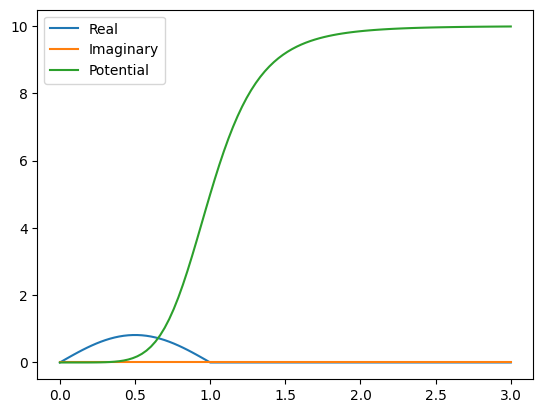

In [122]:
# Plot initial wavefunction and potential
plt.plot(x, psi0[:nx], label='Real')
plt.plot(x, psi0[nx:], label='Imaginary')
v0 = [V(x[i], L, V_type) for i in range(nx)]
plt.plot(x, v0, label='Potential')
plt.legend()

In [123]:
total_time = 1.3
t = np.linspace(0, total_time, int(5*total_time))

psi = it.odeint(PDE, psi0, t, args=(x,V_type,))

52 1.149456016310382 1059.3754678759983 33.13778712317085
52 1.149456016310382 1059.3754654246652 33.137787189843394
52 1.1536879903680135 1122.8257809063307 37.75602326093696
52 1.1536879903680135 1122.825780462043 37.75602333975186
52 1.157919964425645 1183.819208838146 42.63786300092616
52 1.157919964425645 1183.8192075260424 42.63786309419603
52 1.1621519384832766 1241.5285869014092 47.771177360398845
52 1.1621519384832766 1241.5285853370592 47.77117743703405
52 1.1663839125409081 1295.0756083464926 53.14022708616369
52 1.1663839125409081 1295.075606485651 53.14022716308571
52 1.1706158865985397 1343.5354037719933 58.72545571484774
52 1.1706158865985397 1343.535401299449 58.72545577667175
52 1.1748478606561712 1385.9421316064154 64.50330385361721
52 1.1748478606561712 1385.942128775503 64.5033039082557
52 1.1787136382845222 1418.5409282493747 69.92607871312819
52 1.1787136382845222 1418.5409258187005 69.92607874170852
52 1.1825794159128733 1444.4725273762533 75.4622407199529
52 1.1

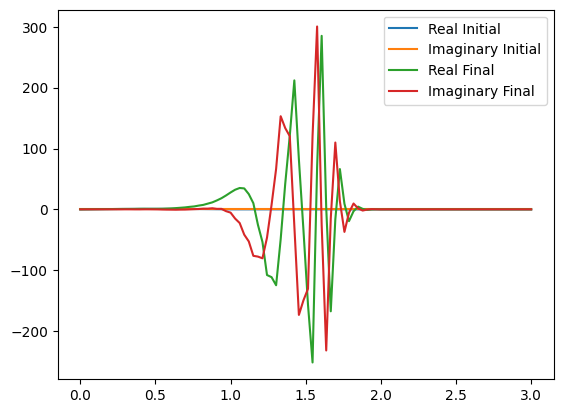

In [124]:
plt.plot(x, psi[0, :nx], label='Real Initial')
plt.plot(x, psi[0, nx:], label='Imaginary Initial')

# plt.plot(x, psi[int(nt/2), :nx], label='Real Halfway')
# plt.plot(x, psi[int(nt/2), nx:], label='Imaginary Halfway')

plt.plot(x, psi[-1, :nx], label='Real Final')
plt.plot(x, psi[-1, nx:], label='Imaginary Final')

plt.legend()

In [85]:
# psi_mag = np.zeros((nt, nx))
# psi_normalized = np.zeros((nt, 2*nx))
# for i in range(nt):
#     psi_mag[i, :] = it.simpson(psi[i, :nx]**2 + psi[i, nx:]**2, x)
#     psi_normalized[i, :nx] = psi[i, :nx]/np.sqrt(psi_mag[i, :])
#     psi_normalized[i, nx:] = psi[i, nx:]/np.sqrt(psi_mag[i, :])
    
psi_prob = np.zeros((nt, nx))
for i in range(nx):
    psi_prob[:, i] = (psi[:, i]**2 + psi[:, nx+i]**2)

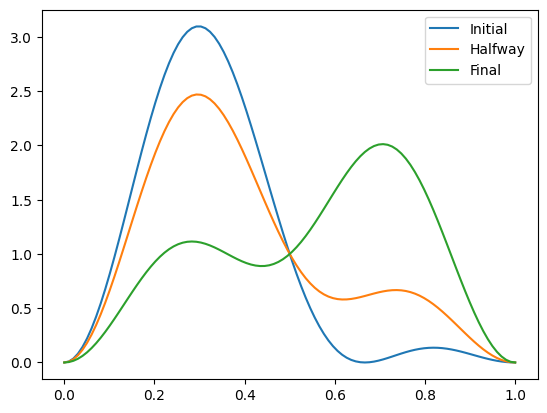

In [86]:
plt.plot(x, psi_prob[0, :], label='Initial')

plt.plot(x, psi_prob[int(nt/2), :], label='Halfway')

plt.plot(x, psi_prob[-1, :], label='Final')

plt.legend()

In [21]:
fig, ax = plt.subplots(1,1)

def animate_complex_psi(frame):
    ax.clear()
    ax.plot(x, psi[frame, :nx], label='Real')
    ax.plot(x, psi[frame, nx:], label='Imaginary')
    ax.set_ylim(-2, 2)
    ax.set_xlim(0, L)
    ax.legend()
    
ani = animation.FuncAnimation(fig, animate_complex_psi, frames=len(psi), repeat=False)

plt.close()
ani.save('complex_psi.gif', dpi=300,
         writer=animation.PillowWriter(fps=30))

In [20]:
fig, ax = plt.subplots(1,1)

def animate_psi_mag(frame):
    ax.clear()
    ax.plot(x, psi_prob[frame, :])
    ax.set_ylim(0, 4)
    ax.set_xlim(0, L)
    
ani = animation.FuncAnimation(fig, animate_psi_mag, frames=len(psi_mag), repeat=False)

plt.close()
ani.save('psi_mag.gif', dpi=300,
         writer=animation.PillowWriter(fps=30))


0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


In [88]:
fig, ax = plt.subplots(1,2)

interval = 5

def animate_psi(frame):
    print(frame)
    ax[0].clear()
    ax[0].plot(x, psi[frame*interval, :nx], label='Real')
    ax[0].plot(x, psi[frame*interval, nx:], label='Imaginary')
    ax[0].set_ylim(-2, 2)
    ax[0].set_xlim(0, L)
    ax[0].legend()
    ax[0].set_title('Wavefunction')
    
    ax[1].clear()
    ax[1].plot(x, psi_prob[frame*interval, :])
    ax[1].set_ylim(0, np.ceil(np.max(psi_prob)))
    ax[1].set_xlim(0, L)
    ax[1].set_title('Probability Density')
    
ani = animation.FuncAnimation(fig, animate_psi, frames=int(len(psi)/interval), repeat=False)

plt.close()
ani.save('wavefunction.gif', dpi=300,
         writer=animation.PillowWriter(fps=30))

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
